##**Домашнее задание по теме "Продвинутая оптимизация"**

**Задание:**

Домашнее задание доступно по ссылке: https://github.com/Netology-DS/MDS/blob/main/MDS-new/HW_7_upd.ipynb.

**Решение:**

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

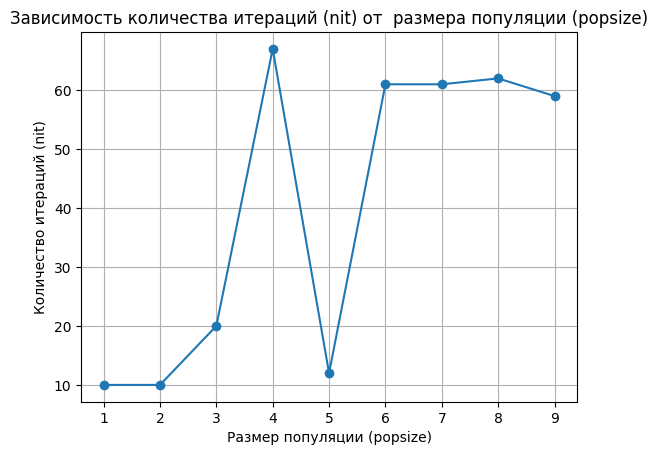

Наименьшее количество итераций:  10
Лучшее значение popsize:  1

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 59
    nfev: 1143


In [ ]:
# Выясним оптимальное значения параметра popsize
strategy = 'best1bin'
popsize_values = range(1, 10, 1)
mutation = 0.5
nit_values = []

for popsize in popsize_values:
    res = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=0.5, seed=42)
    nit_values.append(res.nit)

# Визуализируем
plt.plot(popsize_values, nit_values, marker='o')
plt.xlabel('Размер популяции (popsize)')
plt.ylabel('Количество итераций (nit)')
plt.title('Зависимость количества итераций (nit) от  размера популяции (popsize)')
plt.grid(True)
plt.show()

min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_popsize = popsize_values[min_index]

print("Наименьшее количество итераций: ", min_nit)
print("Лучшее значение popsize: ", best_popsize)
print()
print(res)

Визуализация показывает, что минимальное количество итераций (10) достигается при размере популяции - 1. В целом, можно сказать, что количество итераций (nit) меняется с изменением размера популяции (popsize). Однако эта зависимость имеет нелинейный характер.

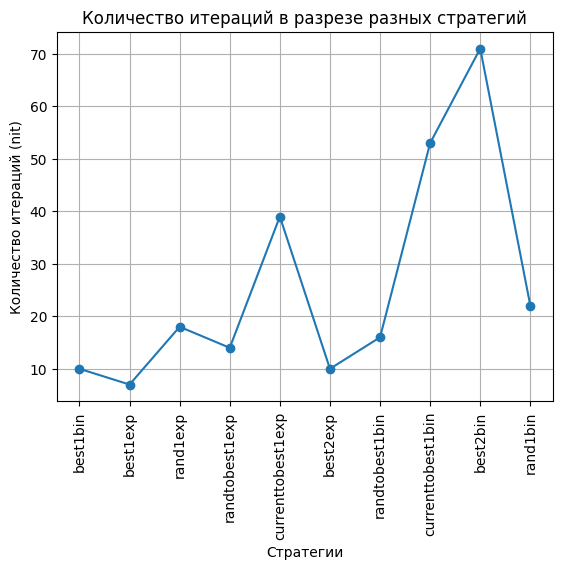

Наименьшее количество итераций: 7

Лучшая стратегия: best1exp

 message: Optimization terminated successfully.
 success: True
     fun: 0.6979929865745125
       x: [-1.193e-01 -2.536e-02]
     nit: 22
    nfev: 370


In [ ]:
# Теперь с оптимальной popsize = 1 выявим лучшую стратегию
popsize = 1
mutation = 0.5
nit_values = []
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand1bin']

for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
    nit_values.append(result.nit)

#Визуализируем
plt.plot(range(len(strategies)), nit_values, marker='o')
plt.xticks(range(len(strategies)), strategies, rotation=90)
plt.xlabel('Стратегии')
plt.ylabel('Количество итераций (nit)')
plt.title('Количество итераций в разрезе разных стратегий')
plt.grid(True)
plt.show()

min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_strategy = strategies[min_index]

print(f"Наименьшее количество итераций: {min_nit}")
print(f"\nЛучшая стратегия: {best_strategy}")
print()
print(result)

Из графика видно, что стратегия `best1exp` показывает наименьшее количество итераций (`nit=7`) для функции `ackley` при оптимальном значении `popsize=1` и мутации 0.5.


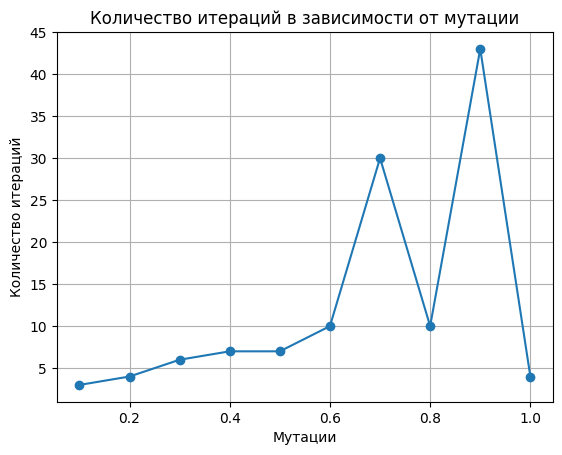

Наименьшее количество итераций:  3
Лучшее значение mutation:  0.1

 message: Optimization terminated successfully.
 success: True
     fun: 3.574451877257783
       x: [-9.685e-01  9.685e-01]
     nit: 4
    nfev: 52
     jac: [ 1.421e-06 -2.842e-06]


In [ ]:
# Определим лучшее значение mutation при popsize = 1 а strategy = 'best1exp'
popsize = 1
strategy = 'best1exp'
mutation_values = np.linspace(0.1, 1, 10)
nit_values = []

for mutation in mutation_values:
    result = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
    nit_values.append(result.nit)

# Визуализируем
plt.plot(mutation_values, nit_values, marker='o')
plt.xlabel('Мутации')
plt.ylabel('Количество итераций')
plt.title('Количество итераций в зависимости от мутации')
plt.grid(True)
plt.show()

min_nit = min(nit_values)
best_mutation = mutation_values[nit_values.index(min_nit)]

print("Наименьшее количество итераций: ", min_nit)
print("Лучшее значение mutation: ", best_mutation)
print()
print(result)


Визуализация показывает, что при значении мутации равном 0.1 достигается наименьшее количество итераций (`nit=3`) для функции `ackley` при использовании стратегии `best1exp` на размере популяции `popsize=1`.

In [ ]:
# Выведем результаты до оптимизации параметров strategy='best1exp', popsize=1, mutation=0.1
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

In [ ]:
# Сравним результаты после оптимизации параметров strategy='best1exp', popsize=1, mutation=0.1
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, strategy='best1exp', popsize=1, mutation=0.1, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 5.381864187490191
       x: [-9.824e-01 -1.965e+00]
     nit: 3
    nfev: 53
     jac: [ 3.553e-07  0.000e+00]

В данной задаче оптимизация параметров `strategy`, `popsize` и `mutation` в алгоритме дифференциальной эволюции позволила сделать функцию `ackley` более эффективной.
При использовании функции ackley были получены наилучшие результаты с использованием стратегии 'best1exp' при значениях `popsize=1` и `mutation=0.1`. То есть в данной ситуации увеличение размера популяции более 1 не привело бы к улучшению результатов, а значение мутации в 0.1 оказалось достаточным для создания достаточного количества разнообразных генотипов в популяции.

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0, method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

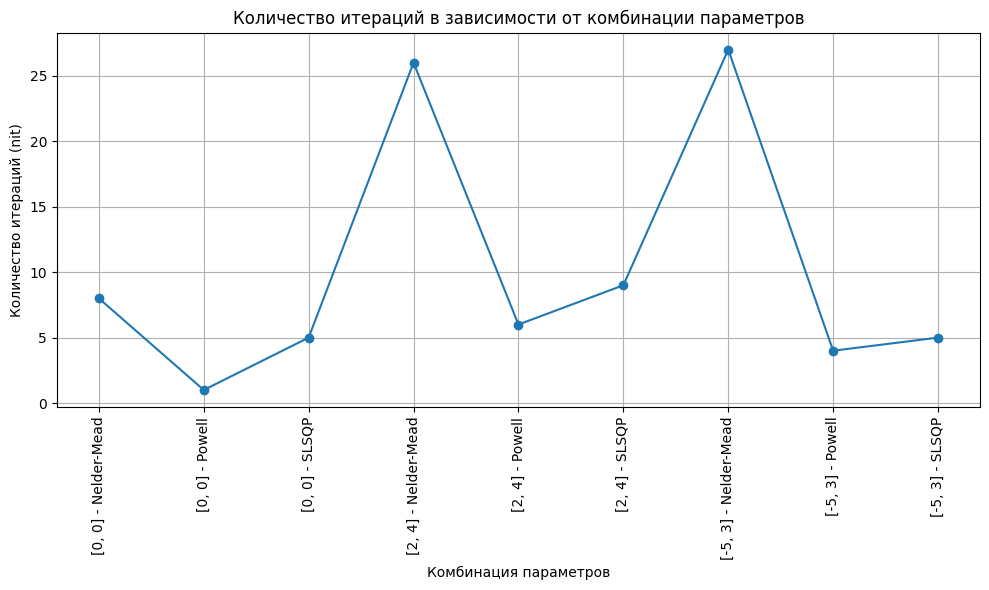

Наименьшее количество итераций:  1

Лучшая комбинация параметров:
Значение x0: [0, 0]
Метод: Powell


In [ ]:
# Найдем оптимальные параметры путем их комбинации
np.random.seed(42)
x0_values = [[0, 0], [2, 4], [-5, 3]]
method_values = ['Nelder-Mead', 'Powell',  'SLSQP']
nit_values = []

for x0 in x0_values:
    for method in method_values:
        result = minimize(ackley, x0, method=method)
        nit_values.append(result.nit)

# Визуализируем
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(nit_values))
ax.plot(x, nit_values, marker='o')
ax.set_xlabel('Комбинация параметров')
ax.set_ylabel('Количество итераций (nit)')
ax.set_title('Количество итераций в зависимости от комбинации параметров')
ax.set_xticks(x)
ax.set_xticklabels([f'{x0} - {method}' for x0 in x0_values for method in method_values], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

min_nit = min(nit_values)
min_index = nit_values.index(min_nit)
best_comb = [x0_values[min_index // len(method_values)], method_values[min_index % len(method_values)]]

print("Наименьшее количество итераций: ", min_nit)
print()
print("Лучшая комбинация параметров:")
print("Значение x0:", best_comb[0])
print("Метод:", best_comb[1])


График демонстрирует наилучшую комбинацию параметров, которая позволяет достичь минимального количества итераций. Это метод 'Powell' и значение x0: [0, 0].

In [ ]:
# Результаты метода 'Nelder-Mead'

result_m1 = minimize(ackley, x0, method='Nelder-Mead')
print(f"Метод 'Nelder-Mead':")
print(f"  Вызов функций: {result_m1.nfev}")
print(f"  Количество итераций: {result_m1.nit}")
print(f"  Значение функции: {result_m1.fun}")

Метод 'Nelder-Mead':
  Вызов функций: 53
  Количество итераций: 27
  Значение функции: 11.217549516850655


In [ ]:
# Результаты метода 'Powell'

result_m2 = minimize(ackley, x0, method='Powell')
print(f"Метод 'Powell':")
print(f"  Вызов функций: {result_m2.nfev}")
print(f"  Количество итераций: {result_m2.nit}")
print(f"  Значение функции: {result_m2.fun}")

Метод 'Powell':
  Вызов функций: 121
  Количество итераций: 4
  Значение функции: 2.579927557029887


In [ ]:
# Результаты метода 'SLSQP'

result_m3 = minimize(ackley, x0, method='SLSQP')
print(f"Метод 'SLSQP':")
print(f"  Вызов функций: {result_m3.nfev}")
print(f"  Количество итераций: {result_m3.nit}")
print(f"  Значение функции: {result_m3.fun}")

Метод 'SLSQP':
  Вызов функций: 20
  Количество итераций: 5
  Значение функции: 11.217549480229295


Результаты показывают, что метод `Powell` является наиболее эффективным и позволяет достичь лучших результатов с наименьшим количеством итераций, хотя и требует немного большего количества вызовов функций.

Однако если в задаче необходимо будет сократить количество вызовов функции, то оптимальным будет метод `Nelder-Mead`. Метод `SLSQ` также можно использовать, однако в эффективности он уступает другим двум методам.